# Regression & Its Evaluation

1. What is Simple Linear Regression?
- Simple Linear Regression is a supervised machine learning algorithm used to model the relationship between one input feature (independent variable) and one output variable (dependent variable) using a straight line.In this algorithm, the model learns from labeled data and tries to find the best-fit line that minimizes the prediction error between actual values and predicted values.
- The mathematical equation of Simple Linear Regression is:
  - Y = β₀ + β₁X

2. What are the key assumptions of Simple Linear Regression?
- Simple Linear Regression works properly only when some basic assumptions are satisfied. These assumptions help in getting accurate predictions and reliable results.
  - Linear Relationship
     - There should be a linear relationship between the independent variable (X) and the dependent variable (Y). This means that changes in X should result in proportional changes in Y, forming a straight-line pattern.
  - Independence of Errors
     - The error terms (residuals) should be independent of each other. This means the error of one observation should not affect the error of another observation.
  - Homoscedasticity
     - The variance of errors should be constant for all values of X. In other words, the spread of residuals should remain approximately the same across the regression line.
  - Normal Distribution of Errors
    - The residuals should be normally distributed. This assumption is important for statistical inference like confidence intervals and hypothesis testing.
  - No Multicollinearity
    - In Simple Linear Regression, there should be only one independent variable, so multicollinearity does not exist. This assumption becomes important in multiple linear regression.
  - No Significant Outliers
    - There should not be extreme outliers in the data, as they can heavily influence the regression line and lead to incorrect predictions.

3. What is heteroscedasticity, and why is it important to address in regression models?
- Heteroscedasticity occurs in a regression model when the variance of the error terms (residuals) is not constant across all values of the independent variable. In simple words, it means that the spread of errors increases or decreases as the value of X changes.
- For example, while predicting house prices, the prediction errors may be small for low-priced houses but very large for expensive houses. This unequal spread of errors is called heteroscedasticity.
- Heteroscedasticity is important to address because it violates one of the key assumptions of linear regression, which is constant variance of errors (homoscedasticity).

4. What is Multiple Linear Regression?
- Multiple Linear Regression is a supervised machine learning algorithm used to model the relationship between one dependent variable and two or more independent variables. It is an extension of Simple Linear Regression, where instead of a single feature, multiple features are used to make predictions. The goal of Multiple Linear Regression is to find the best-fit linear equation that explains how different independent variables together affect the dependent variable.
- The mathematical equation is:
  - Y = β₀ + β₁X₁ + β₂X₂ + … + βₙXₙ
- In machine learning, Multiple Linear Regression is used for:
  - Predicting continuous outcomes
  - Understanding the impact of multiple features on the target variable
  - Building baseline regression models before applying advanced techniques  

5. What is polynomial regression, and how does it differ from linear regression?
- Polynomial Regression is a type of regression technique used when the relationship between the independent variable and the dependent variable is non-linear. Instead of fitting a straight line, polynomial regression fits a curved line by adding higher-degree terms of the input variable.
- The mathematical equation of Polynomial Regression is:
  - Y = β₀ + β₁X + β₂X² + β₃X³ + … + βₙXⁿ
- Difference between Linear Regression and Polynomial Regression:
  - Linear Regression assumes a straight-line relationship between X and Y, while Polynomial Regression can capture curved or non-linear patterns.
  - Linear Regression uses only the first-degree term (X), whereas Polynomial Regression uses higher-degree terms like X², X³, etc.
  - Linear Regression is simple and less prone to overfitting, while Polynomial Regression can overfit if the degree of the polynomial is too high.
  - Polynomial Regression is used when data shows a clear non-linear trend that cannot be explained by a straight line.

  10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
- While building a regression model to predict house prices using features like area, number of rooms, and location, I notice two problems in the model: heteroscedasticity and multicollinearity. To make the model reliable and robust, I would take the following steps.
  - 1. Handling Heteroscedasticity
    - First, I would analyze the residual plot to confirm heteroscedasticity. If the spread of residuals increases with house prices, it indicates non-constant variance.
To fix this, I would apply a log transformation on the dependent variable (house price), as real estate prices usually grow exponentially. This helps stabilize the variance of errors.
If the problem still exists, I would use robust standard errors or Weighted Least Squares (WLS) so that observations with higher variance do not dominate the model.

  - 2. Handling Multicollinearity
    - Next, I would check multicollinearity using the Variance Inflation Factor (VIF). In real estate data, features like area and number of rooms are often highly correlated. If VIF values are high, I would remove or combine correlated features. For example, instead of using both area and number of rooms separately, I could create a new feature like area per room. Another option is using regularization techniques such as Ridge Regression, which reduces the impact of correlated features by penalizing large coefficients.

  - 3. Model Validation and Final Check
    - After addressing both issues, I would retrain the model and re-check residual plots and VIF values to ensure improvements. I would also evaluate performance using metrics like R² and RMSE on validation data to confirm the model is stable and generalizes well.

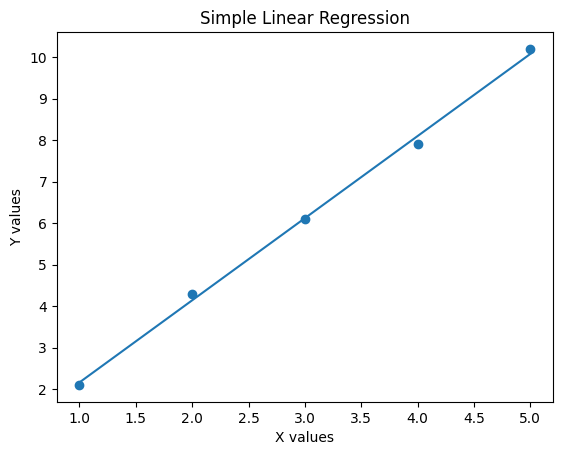

In [ ]:
#Question 6: Implement a Python program to fit a Simple Linear Regression model to
#the following sample data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points

import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Calculate mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Calculate slope (m) and intercept (c)
m = np.sum((X - mean_x) * (Y - mean_y)) / np.sum((X - mean_x) ** 2)
c = mean_y - m * mean_x

# Predicted values
Y_pred = m * X + c

# Plot data points
plt.scatter(X, Y)
# Plot regression line
plt.plot(X, Y_pred)

# Labels and title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Simple Linear Regression")

plt.show()


In [ ]:
#Question 7: Fit a Multiple Linear Regression model on this sample data:
#● Area = [1200, 1500, 1800, 2000]
#● Rooms = [2, 3, 3, 4]
#● Price = [250000, 300000, 320000, 370000]
#Check for multicollinearity using VIF and report the results.

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Given data
data = {
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

# Independent variables
X = df[["Area", "Rooms"]]

# Add constant for VIF calculation
X_const = sm.add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

print(vif_data)


  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


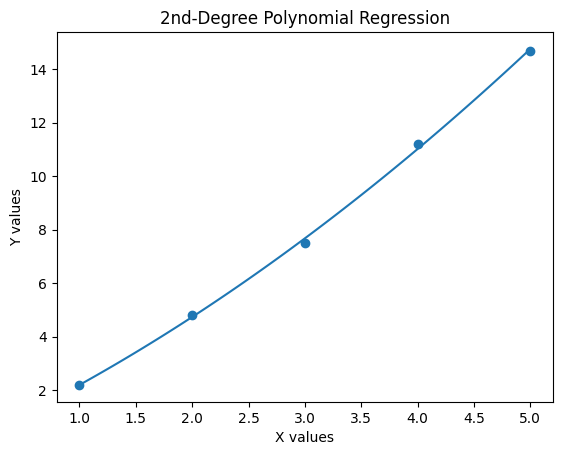

Polynomial Coefficients: [0.2  1.94 0.06]


In [ ]:
#Question 8: Implement polynomial regression on the following data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve

import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Fit a 2nd-degree polynomial
coefficients = np.polyfit(X, Y, 2)
poly_model = np.poly1d(coefficients)

# Generate smooth X values for plotting the curve
X_curve = np.linspace(1, 5, 100)
Y_curve = poly_model(X_curve)

# Plot original data points
plt.scatter(X, Y)
# Plot polynomial regression curve
plt.plot(X_curve, Y_curve)

# Labels and title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("2nd-Degree Polynomial Regression")

plt.show()

# Display polynomial equation coefficients
print("Polynomial Coefficients:", coefficients)


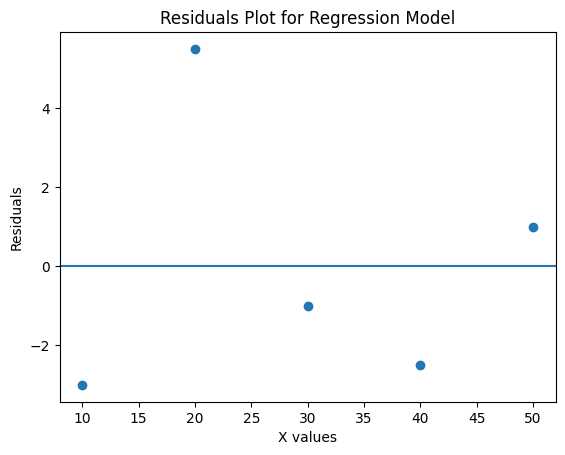

In [ ]:
#Question 9: Create a residuals plot for a regression model trained on this data:
#● X = [10, 20, 30, 40, 50]
#● Y = [15, 35, 40, 50, 65]
#Assess heteroscedasticity by examining the spread of residuals

import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([10, 20, 30, 40, 50])
Y = np.array([15, 35, 40, 50, 65])

# Fit simple linear regression
mean_x = np.mean(X)
mean_y = np.mean(Y)

m = np.sum((X - mean_x) * (Y - mean_y)) / np.sum((X - mean_x) ** 2)
c = mean_y - m * mean_x

# Predicted values
Y_pred = m * X + c

# Residuals
residuals = Y - Y_pred

# Residuals plot
plt.scatter(X, residuals)
plt.axhline(0)
plt.xlabel("X values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Regression Model")
plt.show()
